In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys
import seaborn as sns
# import cobra
import scipy.stats as st
import scipy
sys.path.append('../../code/')
sys.path.append('/Users/ssulheim/git/mwf_gems/code/python')
import leakage_reframed
import ng_utils
import reframed

/var/folders/h6/4b_zz_cd5d92w2ycp017ytn00000gp/T/ipykernel_69671/4084710593.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
model_ez = reframed.load_cbmodel('../../models/e_coli/momentiJO1366.xml')
model_ez.solver = 'gurobi'
reframed.FBA(model_ez, constraints={'R_EX_gal_e':(-20,0), 'R_EX_glc__D_e':(0,0)})

Set parameter Username
Academic license - for non-commercial use only - expires 2024-12-19


Objective: 0.24042907395345262
Status: Optimal

In [8]:
r = model_ez.reactions['R_GALKr_TG_forward']

In [15]:
r.to_string()

'R_GALKr_TG_forward: M_atp_c + M_gal_c + 0.0161922306874758 M_prot_pool --> M_adp_c + M_gal1p_c + M_h_c'

In [17]:
model_ez.add_reaction_from_str('R_GALKr_TG_forward2: M_atp_c + M_gal_c --> M_adp_c + M_gal1p_c + M_h_c')

'R_GALKr_TG_forward2'

In [19]:
model_ez.remove_reaction('R_GALKr_TG_forward')

In [20]:
reframed.FBA(model_ez, constraints={'R_EX_gal_e':(-20,0), 'R_EX_glc__D_e':(0,0)})

Objective: 0.50354221214121
Status: Optimal

In [22]:
m = model_ez.metabolites['M_prot_pool']

In [24]:
pool_reactions = model_ez.get_metabolite_reactions('M_prot_pool')

In [26]:
r.

-0.0161922306874758

In [33]:
ez_values = np.zeros(len(pool_reactions))
for i, r_id in enumerate(pool_reactions):
    ez_values[i] = np.abs(model_ez.reactions[r_id].stoichiometry['M_prot_pool'])

In [34]:
ez_values

array([4.28631333e-04, 1.23225089e-04, 1.94420624e-03, ...,
       2.31055472e-05, 2.31055472e-05, 1.00000000e+00])

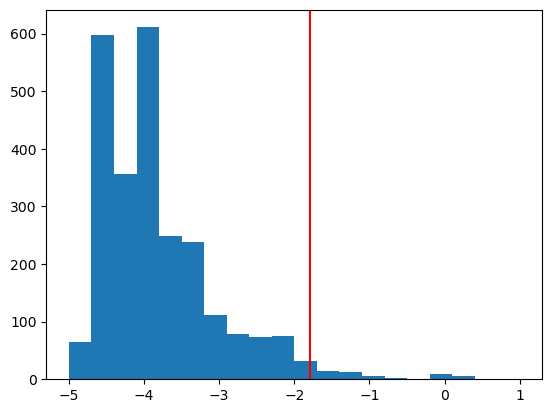

In [38]:
plt.hist(np.log10(ez_values), range = (-5, 1), bins = 20)
plt.axvline(np.log10(0.01619), c = 'r')